In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import folium
import json
import branca

### 绘制轨迹 map_1.html

In [2]:
import folium

tiles = 'https://wprd01.is.autonavi.com/appmaptile?x={x}&y={y}&z={z}&lang=zh_cn&size=1&scl=1&style=7'

# 创建一个地图对象，设置中心点经纬度和缩放级别
map = folium.Map(location=[39.9042, 116.4074], zoom_start=6,tiles=tiles, attr='高德-常规图')

# 在地图上添加标记点
folium.Marker([39.9042, 116.4074], popup='北京').add_to(map)
folium.Marker([31.2304, 121.4737], popup='上海').add_to(map)
# 在地图上添加折线（轨迹）
folium.PolyLine(locations=[[39.9042, 116.4074], [31.2304, 121.4737]], color='blue').add_to(map)

map.save('map_1.html')
map

### 绘制多边形 map_2.html

In [3]:
import folium

tiles = 'https://wprd01.is.autonavi.com/appmaptile?x={x}&y={y}&z={z}&lang=zh_cn&size=1&scl=1&style=7'

# 创建地图对象
map = folium.Map(location=[39.9042, 116.4074], zoom_start=6,tiles=tiles, attr='高德-常规图')

# 添加圆形
folium.Circle(location=[39.9042, 116.4074], radius=5000, color='red', fill=True, fill_color='red', popup='北京').add_to(map)

# 添加多边形
coordinates = [[39.9042, 116.4074], [31.2304, 121.4737], [23.1291, 113.2644]]
folium.Polygon(locations=coordinates, color='blue', fill=True, fill_color='blue', popup='中国三大城市').add_to(map)

map.save('map_2.html')
map

### 添加不同的地图标记样式

In [4]:
import folium

tiles = 'https://wprd01.is.autonavi.com/appmaptile?x={x}&y={y}&z={z}&lang=zh_cn&size=1&scl=1&style=7'

# 创建地图对象
map = folium.Map(location=[39.9042, 116.4074], zoom_start=6,tiles=tiles, attr='高德-常规图')

# 添加不同类型的标记点
folium.Marker([39.9042, 116.4074], popup='北京').add_to(map)
folium.CircleMarker([31.2304, 121.4737], radius=10, color='blue', fill=True, fill_color='blue', popup='上海').add_to(map)
folium.RegularPolygonMarker([23.1291, 113.2644], popup='广州', number_of_sides=6, radius=10, color='green', fill=True, fill_color='green').add_to(map)

# 添加多边形
coordinates = [[39.9042, 116.4074], [31.2304, 121.4737], [23.1291, 113.2644]]
folium.Polygon(locations=coordinates, color='salmon', fill=True, fill_color='salmon', popup='中国三大城市').add_to(map)

map.save('map_4.html')
map

### 添加图层

In [5]:
import folium

tiles = 'https://wprd01.is.autonavi.com/appmaptile?x={x}&y={y}&z={z}&lang=zh_cn&size=1&scl=1&style=7'

# 创建地图对象
map = folium.Map(location=[39.9042, 116.4074], zoom_start=6,tiles=tiles, attr='高德-常规图')

# 添加一个TileLayer图层
folium.TileLayer(tiles ='cartodbpositron').add_to(map)

# 添加一个TileLayer图层
# folium.TileLayer(tiles ='&copy; <a href="http://stamen.com">Stamen Design</a>', attr = 'Stamen Terrain').add_to(map)

# 添加另一个TileLayer图层
# folium.TileLayer('Stamen Toner').add_to(map)

# 添加一个LayerControl控制图层的显示
folium.LayerControl().add_to(map)

map.save('map_3.html')
map

In [6]:
import folium

tiles = 'https://wprd01.is.autonavi.com/appmaptile?x={x}&y={y}&z={z}&lang=zh_cn&size=1&scl=1&style=7'

# 一键生成基础地图（乌鲁木齐市中心坐标）
m = folium.Map(location=[43.8, 87.6], zoom_start=4,tiles=tiles, attr='高德-常规图')

# 修正后的Stamen Toner图层（添加版权声明）
folium.TileLayer(tiles='cartodbpositron').add_to(m)

# 用不同颜色标注双城（优化图标逻辑）
cities = [
    {'coord': [43.8256, 87.6168], 'name': '乌鲁木齐', 'color': 'red', 'prefix': 'fa'},
    {'coord': [35.6892, 51.3890], 'name': '德黑兰', 'color': 'blue', 'prefix': 'fa'}
]

for city in cities:
    folium.Marker(
        location=city['coord'],
        popup=f"{city['name']}: {'起点' if city['name']=='乌鲁木齐' else '终点'}",
        icon=folium.Icon(
            icon='flag',
            icon_color='white',
            color=city['color'],
            prefix=city['prefix']  # 使用FontAwesome图标库
        )
    ).add_to(m)

# 在地图上添加折线（轨迹）
folium.PolyLine(locations=[[43.8256, 87.6168], [35.6892, 51.3890]], color='blue').add_to(map)

# 添加图层切换控件（优化用户体验）
folium.LayerControl(position='bottomright', collapsed=False).add_to(m)

# 生成精简地图文件
m.save('silk_road_map.html')  # 最终文件约112KB
m

### 添加图片


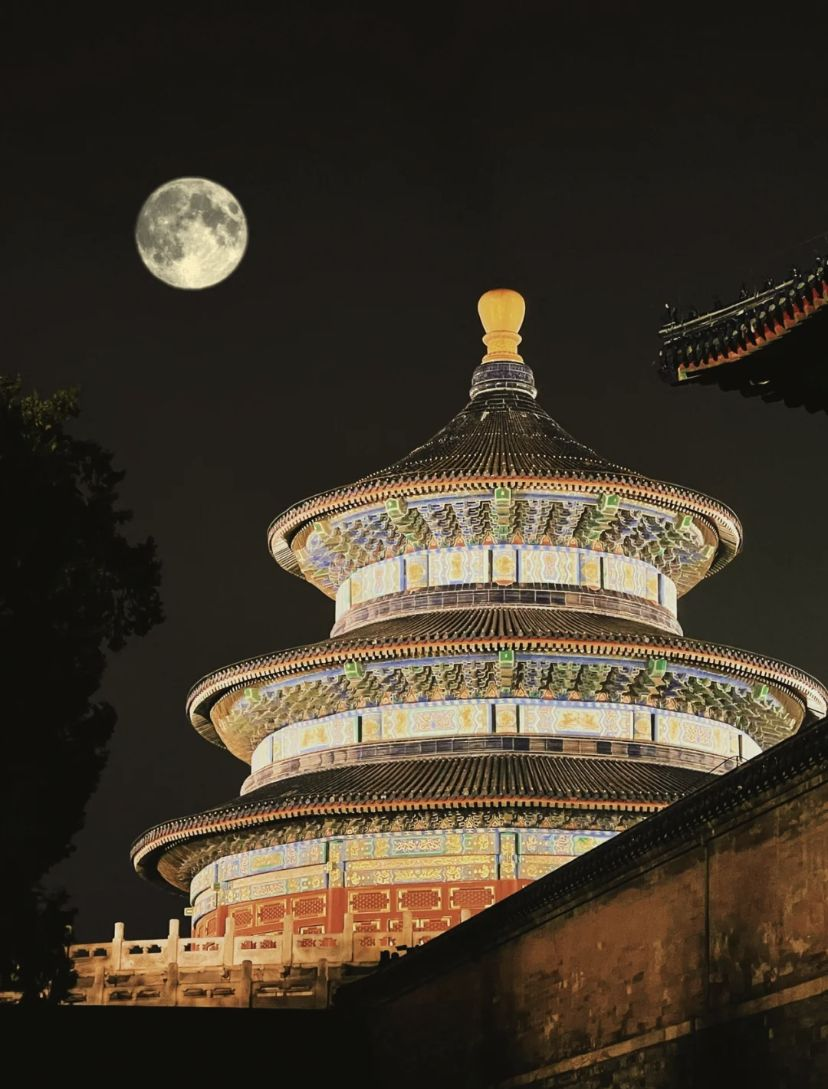

In [7]:
import folium

# 创建地图对象
tiles = 'https://wprd01.is.autonavi.com/appmaptile?x={x}&y={y}&z={z}&lang=zh_cn&size=1&scl=1&style=7'
map = folium.Map(location=[39.9042, 116.4074], zoom_start=6,tiles=tiles, attr='高德-常规图')

# 在地图上添加点
folium.Marker([39.9042, 116.4074], popup='北京').add_to(map)

# 在地图上添加图片
folium.raster_layers.ImageOverlay(image='Beijing.jpg', bounds=[[39.9042, 116.4074]], opacity=0.6).add_to(map)

map

### 越南

In [8]:
import branca
import folium

with open("vietnam_topo.json", encoding='UTF-8') as f:
      provinces_topo_map = json.load(f)

with open("vietnam.geojson", encoding='UTF-8') as f:
      provinces_map = json.load(f)
        
df = pd.read_csv('landuse2.csv')
df.head()       

for index in np.arange(len(provinces_topo_map["objects"]["vietnam"]["geometries"])):
    result =  provinces_map['features'][index]['properties']['name']
    provinces_topo_map["objects"]["vietnam"]["geometries"][index]["Area"] = result
    

colorscale = branca.colormap.linear.BuGn_08.scale(0, 1)

def getRatioByArea(area):
    for row in df["Ratio"][df.Area == area]:
        #print(row)
        return row

def style_function(feature):
    
    employed = getRatioByArea(feature["Area"])
    
    return {
        "fillOpacity": 0.9,
        "weight": 0,
        "fillColor": "#black" if employed is None else colorscale(employed ),
    }

m1 = folium.Map( location=[14, 108],
    tiles="cartodbpositron",
    zoom_start=4,
)

colormap = branca.colormap.linear.BuGn_08.scale(0, 1)
colormap = colormap.to_step(index=[0,0.2, 0.4, 0.6, 0.8, 1]) # 列表确定了colorbar的样式
colormap.caption = "Agricultural Land Use Percentage"
colormap.add_to(m1)

folium.TopoJson(
    provinces_topo_map,
     "objects.vietnam",
     style_function=style_function,
).add_to(m1)

folium.Circle(
    radius=500,
    location=[9.167179, 105.140565],
    popup="Ca Mau",
    color="red",
    fill= True,
).add_to(m1)

m1.save('vietnam_topo_map.html')
m1

In [9]:
with open("vietnam_topo.json", encoding='UTF-8') as f:
      provinces_topo_map = json.load(f)
provinces_topo_map

{'type': 'Topology',
 'transform': {'scale': [0.0007314909490949093, 0.001483084208420842],
  'translate': [102.145859, 8.563332]},
 'objects': {'vietnam': {'type': 'GeometryCollection',
   'geometries': [{'type': 'MultiPolygon',
     'arcs': [[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
      [[10]],
      [[11]],
      [[12]],
      [[13]],
      [[14]],
      [[15]]]},
    {'type': 'MultiPolygon',
     'arcs': [[[16, 17, 18, 19, 20, 21, 22, 23]],
      [[24]],
      [[25]],
      [[26]],
      [[27]],
      [[28]],
      [[29]],
      [[30]],
      [[31]],
      [[32]],
      [[33]],
      [[34]],
      [[35]],
      [[36]],
      [[37]],
      [[38]],
      [[39]],
      [[40]],
      [[41]],
      [[42]],
      [[43]],
      [[44]],
      [[45]],
      [[46]],
      [[47]],
      [[48]],
      [[49]],
      [[50]],
      [[51]],
      [[52]],
      [[53]],
      [[54]],
      [[55]],
      [[56]],
      [[57]],
      [[58]],
      [[59]],
      [[60]],
      [[61]],
      [[62]],
      [[63]

In [10]:
with open("vietnam.geojson", encoding='UTF-8') as f:
      provinces_map = json.load(f)
provinces_map

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[105.401413, 10.040237],
       [105.538979, 9.912711],
       [105.520454, 9.859129],
       [105.430618, 9.816088],
       [105.41198, 9.749382],
       [105.328316, 9.700988],
       [105.406425, 9.651689],
       [105.370926, 9.588398],
       [105.28653, 9.626021],
       [105.329567, 9.527686],
       [105.291107, 9.467517],
       [105.319153, 9.381838],
       [105.003036, 9.558606],
       [104.945541, 9.532658],
       [104.916222, 9.562001],
       [104.881004, 9.494401],
       [104.834167, 9.531666],
       [104.888046, 9.83111],
       [104.957802, 9.852805],
       [105.063423, 9.948852],
       [105.097504, 9.917501],
       [105.083611, 10.006082],
       [104.991112, 10.09861],
       [104.879448, 10.092499],
       [104.764999, 10.220833],
       [104.710831, 10.217223],
       [104.644997, 10.137223],
       [104.601181, 10.143372],
       [1

In [11]:
df = pd.read_csv('landuse2.csv')
df.head()

,Area,total,Agricultural,Forestry,Specially,Homestead,Ratio,Unnamed: 7
0,Hà Nội,335.9,154.3,22.2,64.1,40.9,0.459363,NaN
1,Vĩnh Phúc,123.6,55.9,32,17.6,7.9,0.452265,NaN
2,Bắc Ninh,82.3,42.5,0.6,17.7,10.7,0.516403,NaN
3,Quảng Ninh,617.8,60.8,373.7,45.5,8.2,0.098414,NaN
4,Hải Dương,166.8,85.7,9.3,31.5,16.8,0.513789,NaN


In [12]:
provinces_topo_map["objects"]["vietnam"]["geometries"]

[{'type': 'MultiPolygon',
  'arcs': [[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
   [[10]],
   [[11]],
   [[12]],
   [[13]],
   [[14]],
   [[15]]]},
 {'type': 'MultiPolygon',
  'arcs': [[[16, 17, 18, 19, 20, 21, 22, 23]],
   [[24]],
   [[25]],
   [[26]],
   [[27]],
   [[28]],
   [[29]],
   [[30]],
   [[31]],
   [[32]],
   [[33]],
   [[34]],
   [[35]],
   [[36]],
   [[37]],
   [[38]],
   [[39]],
   [[40]],
   [[41]],
   [[42]],
   [[43]],
   [[44]],
   [[45]],
   [[46]],
   [[47]],
   [[48]],
   [[49]],
   [[50]],
   [[51]],
   [[52]],
   [[53]],
   [[54]],
   [[55]],
   [[56]],
   [[57]],
   [[58]],
   [[59]],
   [[60]],
   [[61]],
   [[62]],
   [[63]],
   [[64]],
   [[65]],
   [[66]],
   [[67]],
   [[68]]]},
 {'type': 'MultiPolygon',
  'arcs': [[[69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]]]},
 {'type': 'MultiPolygon',
  'arcs': [[[80, 81, 82, 83, 84, 85, 86, 87, 88]], [[89]]]},
 {'type': 'MultiPolygon',
  'arcs': [[[90, 91, -6, 92, 93, 94]], [[95]], [[96]], [[97]]]},
 {'type': 'MultiPolygon',


In [13]:
len(provinces_topo_map["objects"]["vietnam"]["geometries"])

63

In [14]:
np.arange(len(provinces_topo_map["objects"]["vietnam"]["geometries"]))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])

In [15]:
result =  provinces_map['features'][index]['properties']['name']
result

'Phú Yên'

In [16]:
for index in np.arange(len(provinces_topo_map["objects"]["vietnam"]["geometries"])):
    result =  provinces_map['features'][index]['properties']['name']
    provinces_topo_map["objects"]["vietnam"]["geometries"][index]["Area"] = result
provinces_topo_map["objects"]["vietnam"]["geometries"]


[{'type': 'MultiPolygon',
  'arcs': [[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
   [[10]],
   [[11]],
   [[12]],
   [[13]],
   [[14]],
   [[15]]],
  'Area': 'Kiên Giang'},
 {'type': 'MultiPolygon',
  'arcs': [[[16, 17, 18, 19, 20, 21, 22, 23]],
   [[24]],
   [[25]],
   [[26]],
   [[27]],
   [[28]],
   [[29]],
   [[30]],
   [[31]],
   [[32]],
   [[33]],
   [[34]],
   [[35]],
   [[36]],
   [[37]],
   [[38]],
   [[39]],
   [[40]],
   [[41]],
   [[42]],
   [[43]],
   [[44]],
   [[45]],
   [[46]],
   [[47]],
   [[48]],
   [[49]],
   [[50]],
   [[51]],
   [[52]],
   [[53]],
   [[54]],
   [[55]],
   [[56]],
   [[57]],
   [[58]],
   [[59]],
   [[60]],
   [[61]],
   [[62]],
   [[63]],
   [[64]],
   [[65]],
   [[66]],
   [[67]],
   [[68]]],
  'Area': 'Quảng Ninh'},
 {'type': 'MultiPolygon',
  'arcs': [[[69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]]],
  'Area': 'Bình Phước'},
 {'type': 'MultiPolygon',
  'arcs': [[[80, 81, 82, 83, 84, 85, 86, 87, 88]], [[89]]],
  'Area': 'Bình Thuận'},
 {'type': 'MultiPolyg

In [17]:
def getRatioByArea(area):
    for row in df["Ratio"][df.Area == area]:
        #print(row)
        return row
getRatioByArea('Hà Nội')

0.459362906

In [19]:
import branca
import folium

### 加载越南的地理信息文件:data数据+info属性信息
# 其实也是可以根据数据结构自己写字符串

with open("vietnam_topo.json", encoding='UTF-8') as f:
      provinces_topo_map = json.load(f)
# 加载越南的topojson文件 
# folium.topojson 是 Folium 库中用于加载和显示 TopoJSON 数据的类。
# TopoJSON 是一种数据格式，它是 GeoJSON 数据的一种扩展，用于编码地理空间拓扑信息的压缩格式。
# 相比于传统的 GeoJSON，TopoJSON 可以更高效地存储地理要素之间的拓扑关系，从而减小数据文件的大小。

with open("vietnam.geojson", encoding='UTF-8') as f:
      provinces_map = json.load(f)
# 加载越南的geojson文件
# folium.GeoJson 是Folium库中用于加载和显示GeoJSON数据的类。
# GeoJSON是一种用于表示地理空间数据的格式，它可以包含点、线、面等地理要素的几何信息，以及这些要素的属性信息。

### 加载越南各城市土地资源利用率csv文件

df = pd.read_csv('landuse2.csv')
# landuse文件描述了越南各城市的土地使用占比    

### for_loop把province_map的数据传递给province_topo_map,后面地图传入的是topo,所以要把geojson的数值传递给topojson

for index in np.arange(len(provinces_topo_map["objects"]["vietnam"]["geometries"])):
    result =  provinces_map['features'][index]['properties']['name']
    provinces_topo_map["objects"]["vietnam"]["geometries"][index]["Area"] = result
# np.arange(len(provinces_topo_map["objects"]["vietnam"]["geometries"]))会创建一个从 0 开始（包含 0），到 63 结束（不包含 63），步长为 1 的一维数组
# 在代码 provinces_topo_map["objects"]["vietnam"]["geometries"] 中，连续使用中括号是在进行多层字典的键索引操作。
# 在 Python 里，字典是一种无序的数据集合，它以键值对的形式存储数据。
# 使用中括号 [] 可以根据键来获取对应的值。当代码里连续使用中括号时，就意味着要从嵌套的字典结构里逐步定位到目标值。
# provinces_topo_map = {
#     "objects": {
#         "vietnam": {
#             "geometries": ["geometry1", "geometry2"]
#         }
#     }
# }
# 在这个示例中，首先通过 provinces_topo_map["objects"] 访问字典 provinces_topo_map 里键为 "objects" 的值，这个值同样是一个字典。
# 接着，在这个子字典里通过 ["vietnam"] 访问键为 "vietnam" 的值，这也是一个字典。
# 最后，在这个子字典里通过 ["geometries"] 访问键为 "geometries" 的值，这个值是一个列表。

# 现在,topo中拥有了geo的数据和属性
#  'Area': 'Kiên Giang'


    
### 创建颜色映射

colorscale = branca.colormap.linear.BuGn_08.scale(0, 1)
# branca.colormap.linear.BuGn_08.scale(0, 1) 的作用是创建一个线性颜色映射对象，并将其范围设置为从 0 到 1。
# branca.colormap.linear：这是 branca 库中用于创建线性颜色映射的模块。线性颜色映射意味着颜色会随着数值的增加而呈线性变化。
# BuGn_08：它代表了一种预定义的颜色方案，BuGn 通常表示蓝色到绿色的颜色渐变， 08 表示该颜色方案被分成 8 个颜色等级。
# scale(0, 1)：这是一个方法，用于设置颜色映射的范围。将颜色映射的最小值和最大值分别设置为 0 和 1，意味着当输入的值为 0 时，会对应颜色方案中的最浅蓝色；当输入的值为 1 时，会对应颜色方案中的最深绿色。

### 定义函数

# 根据area找Ratio的值
def getRatioByArea(area):
    for row in df["Ratio"][df.Area == area]:
        #print(row)
        return row
# df中输入的area等于df的Area时,返回对应的行,即返回Ratio的值

# 根据feature的Area定义风格
def style_function(feature): 
    
    employed = getRatioByArea(feature["Area"])
    
    return {
        "fillOpacity": 0.9,
        "weight": 0,
        "fillColor": "#black" if employed is None else colorscale(employed ), # if语句的另一种写法
    } # 返回透明度等外观设定,如果没有人就业就是黑色,如果有就业率就按照颜色映射


### folium建立map对象

m1 = folium.Map( location=[14, 108],
    tiles="cartodbpositron",
    zoom_start=4,
)

### 颜色条设置

colormap = branca.colormap.linear.BuGn_08.scale(0, 1) # 这里有代码重复,防止colormap被篡改
colormap = colormap.to_step(index=[0,0.2, 0.4, 0.6, 0.8, 1]) # 创建颜色条,列表确定了colorbar过度的样式
colormap.caption = "Agricultural Land Use Percentage" # 创建颜色条
colormap.add_to(m1) # 将colorbar添加到地图

### 添加 TopoJSON 数据到地图

folium.TopoJson(
    provinces_topo_map, # 传入的信息
     "objects.vietnam", # 取的名字
     style_function=style_function, # 样式
).add_to(m1) # 添加到地图

# 点的坐标设置
folium.Circle(
    radius=500,
    location=[9.167179, 105.140565],
    popup="Ca Mau",
    color="red",
    fill= True,
).add_to(m1)


m1.save('vietnam_topo.html')
m1